# Data Cleaning Notebook

## Objectives

*   Evaluate missing data
*   Clean data

## Inputs

* outputs/datasets/collection/TelcoCustomerChurn.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Additional Comments | Insights | Conclusions

 

  * Drop Variables:  `['customerID', 'TotalCharges' ]`



---


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/churnometer/jupyter_notebooks'

We want to make the parent of current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/churnometer'

---

# Load Collected data

In [4]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/TelcoCustomerChurn.csv"
df = pd.read_csv(df_raw_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Pandas Profiling

Quick EDA

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()

# Correlation and PPS Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

* Calculate Correlations and Power Predictive Score

In [6]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  419.0  0.113  0.172  0.0  0.0  0.0  0.156  0.777


Display at Heatmaps



* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



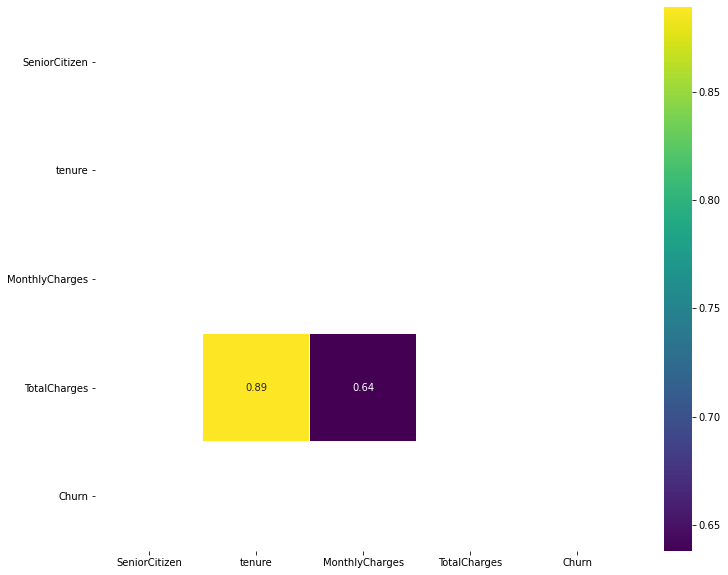



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 





*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



In [9]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.6, PPS_Threshold =0.20,
                  figsize=(12,10), font_annot=10)

# Data Cleaning

## Assessing Missing Data Levels

* Custom function to display missing data levels in a dataframe, it shows the aboslute levels, relative levels and data type

In [10]:
def EvaluateMissingData(df):
  missing_data_absolute = df.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df)*100 , 2)
  df_missing_data = (pd.DataFrame(
                          data= {"RowsWithMissingData": missing_data_absolute,
                                 "PercentageOfDataset": missing_data_percentage,
                                 "DataType":df.dtypes}
                                  )
                    .sort_values(by=['PercentageOfDataset'],ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

  return df_missing_data

Check missing data levels for collected dataset

In [11]:
EvaluateMissingData(df)

RowsWithMissingData  PercentageOfDataset DataType
TotalCharges                   11                 0.16  float64

## Data Cleaning Spreadsheet Summary

* Create a spreadsheet at your Google Drive to list **potential approaches to handle missing data**!

## Dealing with Missing Data


* It is assumed that you  already:
  * assessed the missing data levels, 
  * did a quick EDA, 
  * checked correlation (pearson, spearman),
  * checked power predictive score.
* So you are aware of the variables to work on

---

* **Strategy**
* First, for all variables you need to imput missing data, write potential imputation approach for data cleaning.
  * Over the course, you saw multiple approaches for dealing with missing data, like DropVariables, DropNA, Imput with mean/median/mode, Imput the most frequent item etc

* Then, you will **iterate the steps below across different imputation approaches**, so at the end you will have dealt with all variables with missing data

  * 1 -  Select a **imputation approach**
  * 2 - Select **variables** to apply the approach
  * 3 - Create a **separate dataframe** applying this imputation approach to the selected variables
  * 4 - **Compare** this new dataset with initial dataset to validate/assess the effect on distribution on variables
  * 5 - **If** you are satisfied, **apply** the selected imputation approach to the initial dataframe
  * 6 - **Evaluate** if you have more variables to deal. If yes, iterate. If not, you are done.

---

### Data Cleaning Summary

List here data cleaning approaches you want initially to try.
* Drop


**The list above is your guide, your map to know in which stage you are in the data cleaning process**

### Split Train and Test Set

* You have to split train and test set for cleaning the data
  * Unless you consider only Drop Variables and Drop Rows, which is not the case.
  * Hint: in the majority of the time in the workplace, you will need to split into train and test set

In [13]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['Churn'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (5634, 21) 
TestSet shape: (1409, 21)


In [14]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 1 variables with missing data 



RowsWithMissingData  PercentageOfDataset DataType
TotalCharges                    8                 0.14  float64

### Drop Variables


* Hint: you may drop Variables with more than 80% of missing data, since these variables will likely not add much value. However, this is not the case in this dataset
* Step 1: imputation approach: **Drop Variables**
* Step 2: Select variables to apply the imputation approach


In [15]:
variables_method = ['customerID', 'TotalCharges' ]

print(f"* {len(variables_method)} variables to drop \n\n"
    f"{variables_method}")


* 2 variables to drop 

['customerID', 'TotalCharges']


* We are dropping `CustomerID`, since it is a unique identifier to each customer, it doesn't add information to the dataset as it is
* We are dropping `TotalCharges` since for the context of the ML projects, a prospect doesn't have `TotalCharges`

* Step 3: Create a separate dataframe applying this imputation approach to the selected variables

In [16]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

* Step 4: Assess the effect on variable's distribution

* In this case, no effect on variables distribution, since you are not removing rows, but columns
* The effect might be losing features that might have a relevant impact in your machine learning model.

* Step 5: If you are statisfied, apply the imputation approach in your dataframe

In [17]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

* Step 6: Evaluate if you have more variables to deal. If yes, iterate. If not, you are done.

In [18]:
EvaluateMissingData(TrainSet)

Empty DataFrame
Columns: [RowsWithMissingData, PercentageOfDataset, DataType]
Index: []

# Push cleaned data to Repo

In [19]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)


## Train Set

In [20]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv",index=False)

## Test Set

In [21]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv",index=False)

## **Push** generated/new files from this Session to GitHub repo

* You may now go to "Push generated/new files from this session to GitHub Repo" section and push these files to the repo

* Git status

In [22]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/02 - Churned Customer Study.ipynb
	modified:   jupyter_notebooks/03 - DataCleaning.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	outputs/datasets/cleaned/

no changes added to commit (use "git add" and/or "git commit -a")


* Git commit

In [ ]:
CommitMsg = "add-files-data-cleaning"
! git add .
!git commit -m {CommitMsg}

* Git Push

In [ ]:
!git push origin main

Well done!